In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Basic Task**

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/SOC'2022 Data/GOOG_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/SOC'2022 Data/GOOG_test.csv")

In [3]:
df_train.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
1,2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2,2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
3,2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
4,2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [4]:
df_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [6]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


##**Eploratory Data Analysis**


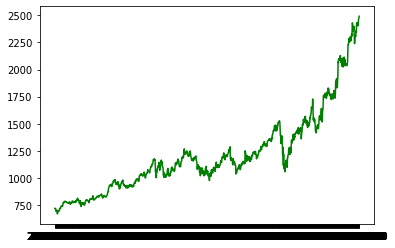

In [7]:
y = df_train.Close
x = df_train.Date
plt.plot(x,y,"g")
plt.show()

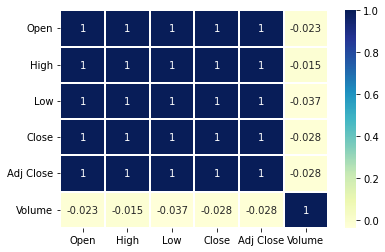

In [8]:
sns.heatmap(df_train.corr(),annot = True,linewidths=1,cbar = True,cmap="YlGnBu")


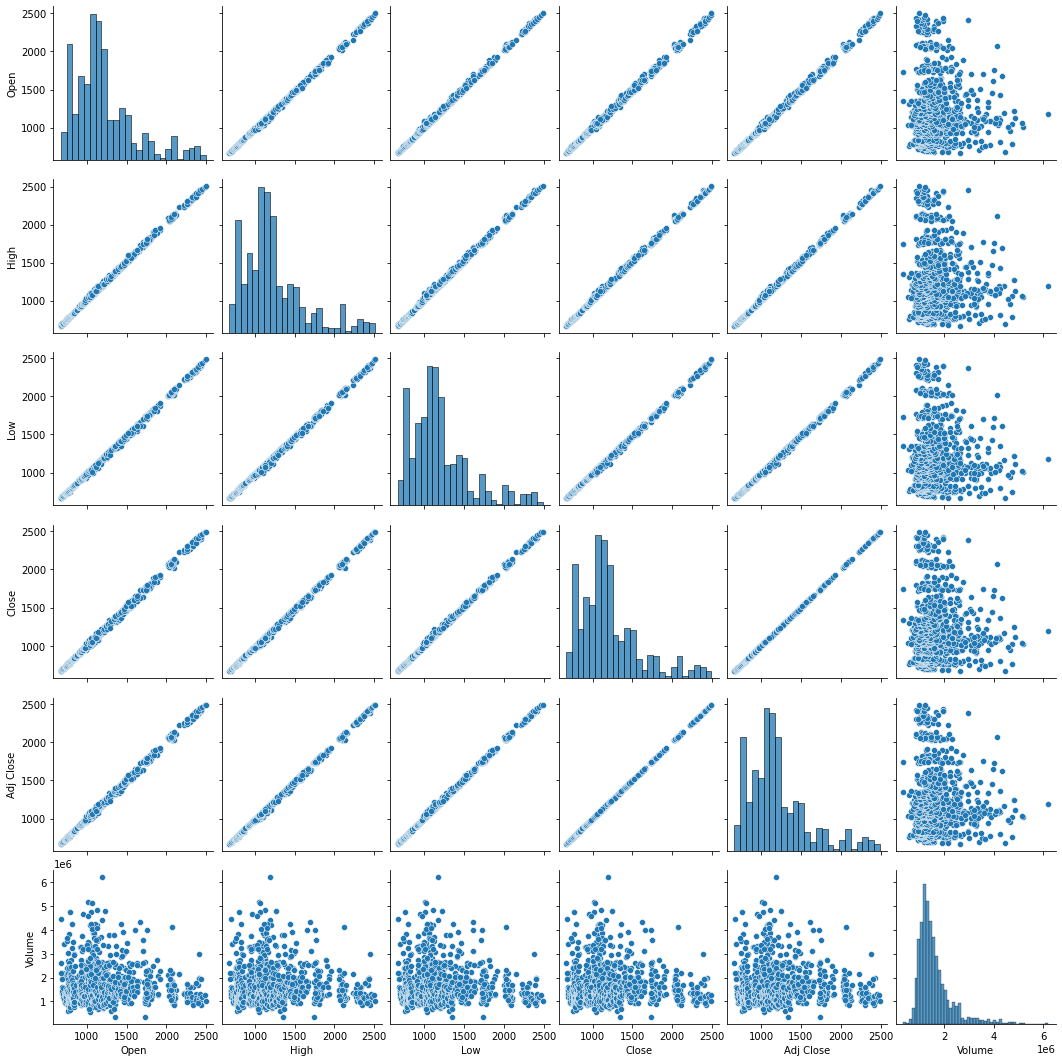

In [9]:
sns.pairplot(df_train)

##**LSTM Approch**

In [10]:
target_tr = df_train.loc[:,["Close"]]
target_ts = df_test.loc[:,["Close"]]

In [11]:
feature_tr = df_train.iloc[:,1:4]
feature_ts = df_test.iloc[:,1:4]

In [12]:
df_train.Date = pd.to_datetime(df_train.Date)
df_test.Date = pd.to_datetime(df_test.Date)

In [13]:
#Train and Test Data are already provided, so no need to devide


In [14]:

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler(feature_range = (0,1))
df_train_scaled = scl.fit_transform(np.array(target_tr))
df_train_scaled

array([[0.02805597],
       [0.02748005],
       [0.0274307 ],
       ...,
       [0.98611746],
       [0.9953104 ],
       [1.        ]])

In [15]:
# I am going to build the sequincial LSTM model, Because we shouldn't take "Open","Low","High" as feature of model

In [16]:
# We Plan to predict the price of equity from the past 20 days data, reason of 20 days is in stock market 1 month having 20 working days

#create x_train,y_train accordingly
x_train = []
y_train = []
for i in range(20,1258):                      #(timestep=30, lenght=1258)
  x_train.append(df_train_scaled[i-20:i,0])
  y_train.append(df_train_scaled[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape,y_train.shape)

(1238, 20, 1) (1238,)


In [17]:
#importing Sequincial model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
model = Sequential()
 
model.add(LSTM(units = 100, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [19]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=20, verbose=2)

Epoch 1/20
62/62 - 11s - loss: 0.0082 - 11s/epoch - 182ms/step
Epoch 2/20
62/62 - 4s - loss: 0.0028 - 4s/epoch - 62ms/step
Epoch 3/20
62/62 - 4s - loss: 0.0024 - 4s/epoch - 63ms/step
Epoch 4/20
62/62 - 4s - loss: 0.0027 - 4s/epoch - 62ms/step
Epoch 5/20
62/62 - 4s - loss: 0.0018 - 4s/epoch - 63ms/step
Epoch 6/20
62/62 - 4s - loss: 0.0017 - 4s/epoch - 63ms/step
Epoch 7/20
62/62 - 4s - loss: 0.0018 - 4s/epoch - 63ms/step
Epoch 8/20
62/62 - 4s - loss: 0.0021 - 4s/epoch - 63ms/step
Epoch 9/20
62/62 - 4s - loss: 0.0021 - 4s/epoch - 63ms/step
Epoch 10/20
62/62 - 4s - loss: 0.0021 - 4s/epoch - 63ms/step
Epoch 11/20
62/62 - 4s - loss: 0.0018 - 4s/epoch - 64ms/step
Epoch 12/20
62/62 - 4s - loss: 0.0015 - 4s/epoch - 63ms/step
Epoch 13/20
62/62 - 4s - loss: 0.0013 - 4s/epoch - 64ms/step
Epoch 14/20
62/62 - 4s - loss: 0.0017 - 4s/epoch - 63ms/step
Epoch 15/20
62/62 - 5s - loss: 0.0012 - 5s/epoch - 79ms/step
Epoch 16/20
62/62 - 4s - loss: 0.0015 - 4s/epoch - 63ms/step
Epoch 17/20
62/62 - 4s - loss:

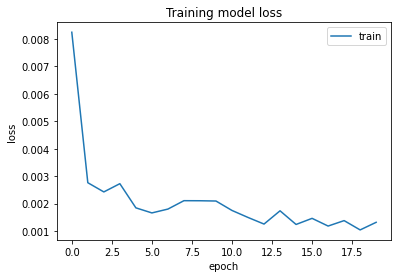

In [20]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()


In [21]:
y_test1 = np.array(target_ts)
df_test_scaled = scl.fit_transform(np.array(target_ts))
df_test_scaled

x_test = []
y_test = []
for i in range(20,len(target_ts)):
  x_test.append(df_test_scaled[i-20:i,0])
  y_test.append(y_test1[i,0])
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape,y_test.shape)

(233, 20, 1) (233,)


In [22]:
y_pred = model.predict(x_test)


In [23]:
predicted_price = scl.inverse_transform(y_pred)

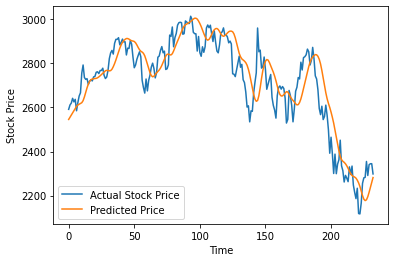

In [24]:
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predicted_price, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, predicted_price)

0.8057958099656355

## **ARIMA Model Approch**

In [26]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
1,2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2,2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
3,2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
4,2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [27]:
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
1,2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2,2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
3,2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
4,2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [28]:
#Target Variable

train_tar = list(df_train.Close)
test_tar = list(df_test.Close)

In [29]:
train_tar.extend(test_tar)


In [30]:
#ADF Test

from statsmodels.tsa.stattools import adfuller

result = adfuller(train_tar)
print("ADF Statistics:", result[0])
print("p Value", result[1])

ADF Statistics: -0.6136582483986682
p Value 0.8678658599134335


In [31]:
#P value is very high, so we can difference data , to find num of difference we can apply mathod shown in video
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from pmdarima.arima.utils import ndiffs

In [33]:
df = train_tar
d_value = ndiffs(df,test = "adf")
print("d value:", d_value)

d value: 1


In [46]:
#Lets define P and Q value for ARIMA Model, by applying auto_arima model
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima



In [35]:
x_train= df[:-253]
x_test = df[-253:]
print(len(x_train),len(x_test))

1258 253


In [36]:
step_fit = auto_arima(df,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14347.096, Time=2.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14353.081, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14344.966, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14345.393, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14353.185, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14346.190, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14344.779, Time=1.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14346.779, Time=1.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14346.728, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14345.148, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.858 seconds


In [37]:
import statsmodels.api as sm

In [38]:
model = sm.tsa.arima.ARIMA(df, order=(1,1,1))

In [39]:
result = model.fit()
print(step_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -7168.390
Date:                Fri, 29 Jul 2022   AIC                          14344.779
Time:                        15:29:31   BIC                          14366.059
Sample:                             0   HQIC                         14352.704
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5704      1.044      1.504      0.133      -0.476       3.617
ar.L1         -0.4993      0.135     -3.690      0.000      -0.764      -0.234
ma.L1          0.4209      0.140      2.997      0.0

In [40]:
from statsmodels.graphics.tsaplots import plot_predict

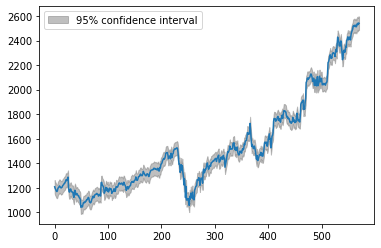

In [41]:
plot_predict(result, start = 700, end = 1270, dynamic = False);

In [42]:
#Now lets Forecast
start = len(x_train)
end= len(x_train) + len(x_test) - 1
fc = result.predict(start=start,end=end)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
sqrt(mean_squared_error(x_test,fc))

47.35160303130853

In [44]:
r2_score(x_test,fc) 

0.9466613348553223

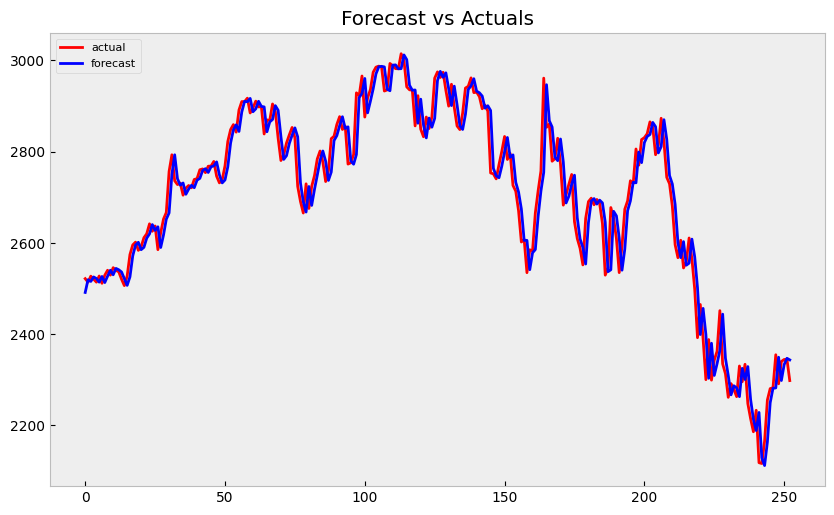

In [45]:
#Plotting 
plt.figure(figsize=(10,6), dpi=100)
plt.style.use("bmh")

#plt.plot(x_train, label='training', color = "green")
plt.plot(x_test,label='actual', color = "red")
plt.plot(fc , label='forecast', color = "blue")
plt.title('Forecast vs Actuals')

plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()